<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [35]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [18]:
# Your code here
import requests
from bs4 import BeautifulSoup 
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Download the webpage at the url


In [41]:
#your code goes here
data= requests.get(url).text

In [42]:
type(data)

str

Create a soup object


In [44]:
#your code goes here
data= requests.get(url).text
soup=BeautifulSoup(data,"html.parser")

In [45]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<title>
Salary survey results of programming languages
</title>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>
<hr/>
<h2>Popular Programming Languages</h2>
<hr/>
<p>Finding out which is the best language is a tough task. A programming language is created to solve a specific problem. A language which is good for task A may not be able to properly handle task B. Comparing programming language is never easy. What we can do, however, is find which is popular in the industry.</p>
<p>There are many ways to find the popularity of a programming languages. Counting the number of google searchs for each language is a simple way to find the popularity. GitHub and StackOverflow also can give some good pointers.</p>
<p>Salary surveys are a way to find out the programmings languages that are most in demand in the industry. Below table is the result of one such survey. When using any survey keep in mind that the results vary year 

In [46]:
# Initialize lists to store extracted data
languages = []
salaries = []

# Extract the relevant data
# Find the table body
table_body = soup.find('tbody')

# Loop through each row in the table
for row in table_body.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) >= 4:  # Check if the row contains enough columns
        language = cols[1].get_text(strip=True)
        salary = cols[3].get_text(strip=True)
        
        # Clean and convert salary to a numeric value
        salary = salary.replace('$', '').replace(',', '')
        try:
            salary = float(salary)
            languages.append(language)
            salaries.append(salary)
        except ValueError:
            continue  # Skip rows where salary cannot be converted to a number


In [47]:
languages

['Python', 'Java', 'R', 'Javascript', 'Swift', 'C++', 'C#', 'PHP', 'SQL', 'Go']

In [48]:
salaries

[114383.0,
 101013.0,
 92037.0,
 110981.0,
 130801.0,
 113865.0,
 88726.0,
 84727.0,
 84793.0,
 94082.0]

In [49]:
# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Language': languages,
    'AverageSalary': salaries
})

In [50]:
df.head()

,Language,AverageSalary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0


In [51]:
df_sorted = df.sort_values(by='AverageSalary', ascending=False)


In [55]:
df.to_csv("popular-languages.csv", index=False)

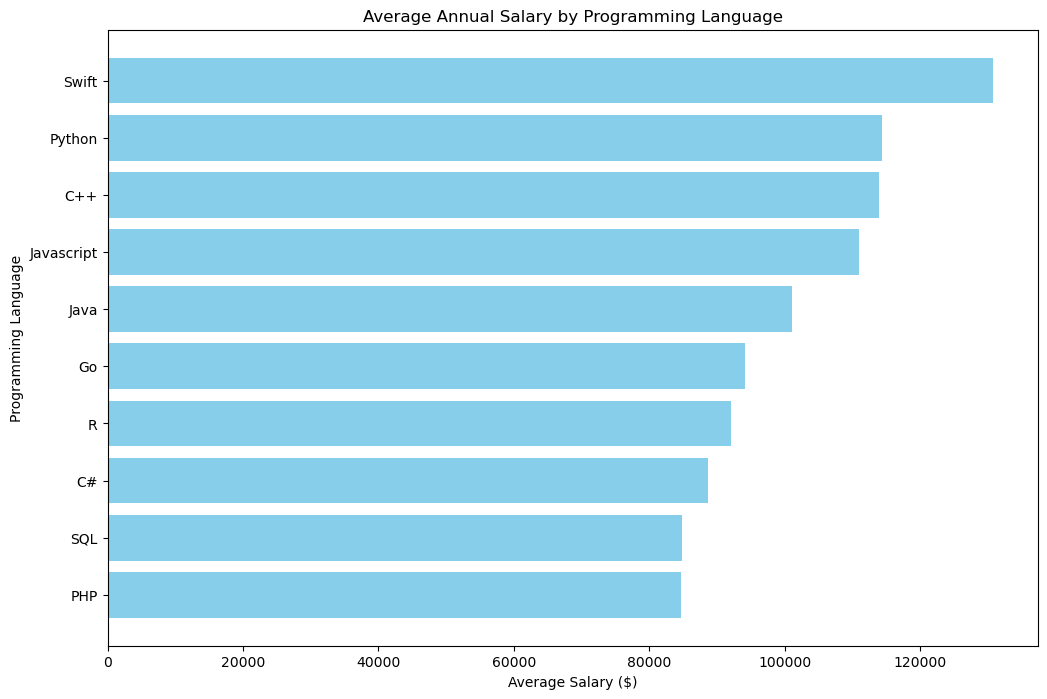

In [52]:

# Create a Bar Chart
plt.figure(figsize=(12, 8))
plt.barh(df_sorted['Language'], df_sorted['AverageSalary'], color='skyblue')
plt.xlabel('Average Salary ($)')
plt.ylabel('Programming Language')
plt.title('Average Annual Salary by Programming Language')
plt.gca().invert_yaxis()  # Display the highest salary at the top
plt.savefig("Average Annual Salary.png")
plt.show()
plt.close()

In [56]:
file_path="/Users/mac/Desktop/Final_Project-/Module 1 Data Collection /jobs.json"

In [ ]:
df = pd.read_json(file_path)

In [66]:
df_group=df.sort_values(by='Job Title', ascending=False)

In [68]:
df_group['Job Title'].value_counts

<bound method IndexOpsMixin.value_counts of 10216    website selling offering Fixed Salary For Nigh...
13971                                web selling(outbound)
9586                                          web dovloper
20165                                        web developer
3979                                          web designer
                               ...                        
12300                   .3242_Hyperion Planning_New Jersey
5808         .3081 _ IOS Developer _ New Jersey (Contract)
8863     ..hiring for Experience Design/web Design *cms...
17026    ..RPA Arizona (UI Path/Blue Prism/Automation A...
15063              - HR - Talent Acquisition - Contractual
Name: Job Title, Length: 27005, dtype: object>

In [70]:

# Count the number of job postings for each job title
job_title_counts = df_group['Job Title'].value_counts()

In [71]:
job_title_counts_sorted = job_title_counts.sort_values(ascending=False)

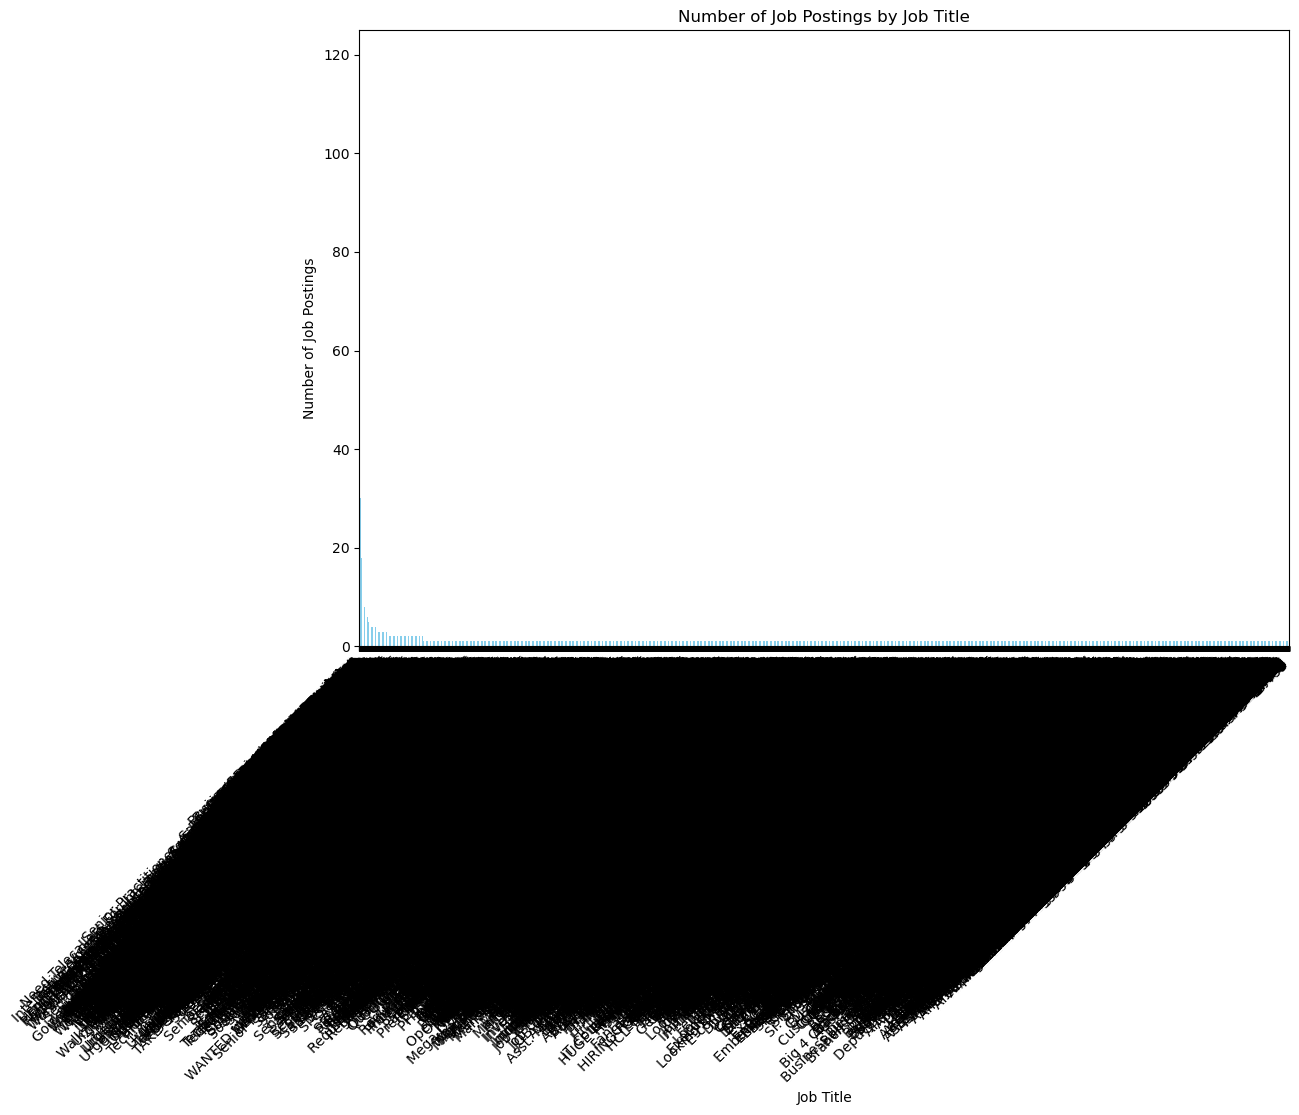

In [72]:
#
plt.figure(figsize=(12, 8))
job_title_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Job Title')
plt.ylabel('Number of Job Postings')
plt.title('Number of Job Postings by Job Title')
plt.xticks(rotation=45, ha='right')  
plt.savefig("number Of job Posting.png")
plt.show()
plt.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
